**Assignment 1**

## About
In this assignment, you will gain experience implementing a linear model, a neural network, and a deep neural network using TensorFlow 2.0. 

* You will use two different development styles. I thought it’d be helpful for you to see both of these early (if you’re familiar with them, you can branch out to any major framework that exist today). 

* Along the way, you'll add code to visualize the weights of a linear model, and provide your own implementation of softmax (so you learn to extend the built-in functionality right off the bat).

This assignment has several parts, plan ahead and get started early (and come to office hours if you’re stuck, the TAs and I are happy to help). Most concepts will be covered in lecture two, just posting it early.

## Instructions

Complete the code in this notebook by searching for the text **"TODO"**.

## Submission instructions

Please submit this assignment on CourseWorks by uploading a Jupyter notebook that includes saved output. If you are working in Colab, you can prepare your notebook for submission by ensuring that runs end-to-end, then saving and downloading it:

1. ```Runtime -> Restart and run all```
1. ```File -> Save```
1. ```File -> Download.ipynb```

## Resources

You can find all the latest tutorials for TensorFlow 2.0 [here](https://www.tensorflow.org/tutorials). Code examples that will help you with each part of the assignment are linked below.



---



## Setup

### Install TensorFlow 2.0

The most recent version of TensorFlow is alreadey installed in Colab. If you prefer working in Jupyter locally, you will need to install TensorFlow following these [instructions](http://tensorflow.org/install).

### Check which TF version is installed
It's good practice to check which version you have installed.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras import Model
import matplotlib.pyplot as plt

## Part 1: First steps with Sequential models

You will work with the Sequential API in this section. This is the easiest way to develop models with TF 2.0, and is the most common in practice. 

Here are a few code examples that will help you with this part of the assignment:

* [Get started for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner)
* [Classify images](https://www.tensorflow.org/tutorials/keras/basic_classification)
* [Explore overfitting and underfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)

### Download and prepare a dataset

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### Define, train, and evaluate a linear model

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4744 - accuracy: 0.8747
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3046 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2737 - accuracy: 0.9235
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2674 - accuracy: 0.9246


[0.2673512101173401, 0.9246000051498413]

### 1a: Plot loss and accuracy

**TODO**

Modify the code below to produce plots showing loss and accuracy as a function of epochs on training and validation data (it's fine to use x_test and y_test as validation data for this assignment). To do so, you will need to add validation data to the call for ```model.fit```, and capture the results in a history object. Code for plotting is provided for you, you can pass your history object to this.

![Plot 1](https://storage.googleapis.com/applied-dl/im/a1-1.png)
![Plot 2](https://storage.googleapis.com/applied-dl/im/a1-2.png)


Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5075 - accuracy: 0.8674 - val_loss: 0.3179 - val_accuracy: 0.9125
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3168 - accuracy: 0.9120 - val_loss: 0.2864 - val_accuracy: 0.9197
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2934 - accuracy: 0.9172 - val_loss: 0.2758 - val_accuracy: 0.9237
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2808 - accuracy: 0.9219 - val_loss: 0.2716 - val_accuracy: 0.9230
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2738 - accuracy: 0.9231 - val_loss: 0.2650 - val_accuracy: 0.9277
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2676 - accuracy: 0.9256 - val_loss: 0.2643 - val_accuracy: 0.9286
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2642 - accuracy: 0.9262 - val_loss: 0.2658 - val_accuracy:

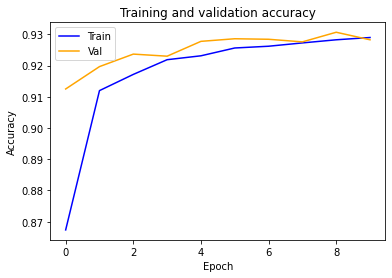

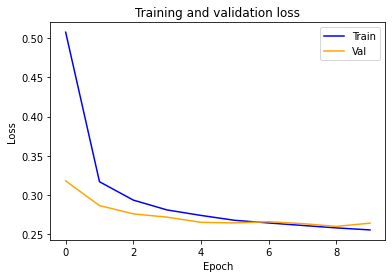

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# TODO
#
# 1. create a history object to store the results of model.fit
# ```history = model.fit(...)```
#
# 2. add another parameter to model.fit for validation data
# https://keras.io/models/sequential/
history = model.fit(x_train, y_train, epochs=10,
                    validation_split = 0.2)

# A plotting function you can reuse
def plot(history):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  
plot(history)

### 1b: Implement a neural network 

**TODO**

Modify the code below to create a neural network (with a single hidden layer). Add a Dense layer with 128 units and ReLU activation. Train and evaluate your model. How does the accuracy compare with the linear model above? It is not necessary to produce plots for this section.

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # TODO: Add a layer here
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5,
          validation_split = 0.2)
model.evaluate(x_test, y_test)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2874 - accuracy: 0.9174 - val_loss: 0.1529 - val_accuracy: 0.9576
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1276 - accuracy: 0.9615 - val_loss: 0.1138 - val_accuracy: 0.9688
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0861 - accuracy: 0.9745 - val_loss: 0.0947 - val_accuracy: 0.9726
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0634 - accuracy: 0.9812 - val_loss: 0.0968 - val_accuracy: 0.9715
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0855 - accuracy: 0.9735


[0.08546392619609833, 0.9735000133514404]

Comparing neural network with one hidden layer to neural net with not hidden layers, we see approx. 5% increase in accuracy (92.8% -> 98.59%) in validation set. This shows that neural net with one hidden layer was able to capture more complex information from the data which was helpful for classification. 

### 1c: Implement a deep neural network 

**TODO**

Modify the code below to create and train a deep neural network with at least two hidden layers.

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # TODO: Add two layers here
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2484 - accuracy: 0.9254
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1021 - accuracy: 0.9684
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0740 - accuracy: 0.9773
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0568 - accuracy: 0.9816
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0478 - accuracy: 0.9847


### 1d: Display predictions and their confidence 

**TODO**

1. Choose one of your models above. Use it to make predictions on the entire test set using ```model.predict```

2. Next, identify one image from the testing set the model classifies correctly, and another that it classifies incorrectly. Add code to display these images below, the correct labels, the predicted labels, and the confidence scores.

Text(0.5, 1.0, 'Incorrectly identified image')

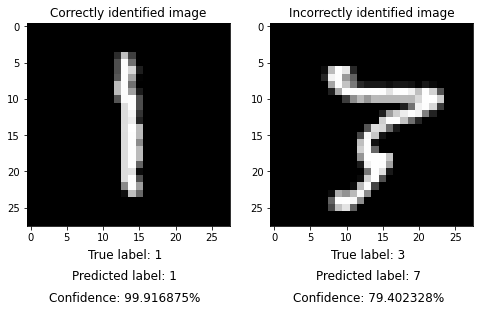

In [8]:
# TODO: add your code here
# TODO: add your code here
import numpy as np
from sklearn.metrics import confusion_matrix

test_preds = model.predict(x_test)
test_preds_labels = np.argmax(test_preds, axis=1)

correct_ind = np.where(test_preds_labels == y_test)[0]
incorrect_ind = np.where(test_preds_labels != y_test)[0]
#confusion_matrix(test_preds_labels, y_test)

np.random.seed(4)

correct_img_index = np.random.choice(correct_ind, size = 1)
incorrect_img_index = np.random.choice(incorrect_ind, size = 1)

fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].imshow(x_test[correct_img_index].reshape(28,28), plt.get_cmap('gray'))
ax[0].text(13, 32, 'True label: {}'.format(y_test[correct_img_index][0]), ha = 'center', size = 12)
ax[0].text(13, 35, 'Predicted label: {}'.format(test_preds_labels[correct_img_index][0]), ha = 'center', size = 12)
ax[0].text(13, 38, 'Confidence: {:%}'.format(test_preds[correct_img_index, test_preds_labels[correct_img_index]][0]), ha = 'center', size = 12)
ax[0].set_title('Correctly identified image')

ax[1].imshow(x_test[incorrect_img_index].reshape(28,28), plt.get_cmap('gray'))
ax[1].text(13, 32, 'True label: {}'.format(y_test[incorrect_img_index][0]), ha = 'center', size = 12)
ax[1].text(13, 35, 'Predicted label: {}'.format(test_preds_labels[incorrect_img_index][0]), ha = 'center', size = 12)
ax[1].text(13, 38, 'Confidence: {:%}'.format(test_preds[incorrect_img_index, test_preds_labels[incorrect_img_index]][0]), ha = 'center', size = 12)
ax[1].set_title('Incorrectly identified image')


## Part 2: Subclassed models

In this part of the assignment, you'll work with the Keras Subclassing API. Instead of using a built-in method (```model.fit```) you will train models using a GradientTape.

Here are a few code examples that will help you with this part of the assignment:

* [Get started for experts](https://www.tensorflow.org/tutorials/quickstart/advanced)
* [Eager execution](https://www.tensorflow.org/guide/eager)
* [Keras overview](https://www.tensorflow.org/guide/keras/overview)
* [Writing custom models](https://www.tensorflow.org/guide/keras/custom_layers_and_models)

### Download and prepare a dataset
This is similar to the above, except now we'll use ```tf.data``` to batch and shuffle the data, instead of the utilities baked into ```model.fit```. It's not necessary for this assignment, but if you wish, you can learn how to use tf.data [here](https://www.tensorflow.org/guide/data).

In [9]:
# Download a dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Batch and shuffle the data
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train.astype('float32') / 255, y_train)).shuffle(1024).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices(
    (x_test.astype('float32') / 255, y_test)).batch(32)

tf.Tensor(6, shape=(), dtype=uint8)


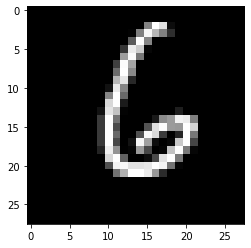

In [10]:
# A quick example of iterating over a dataset object
for image, label in train_ds.take(1):
  plt.imshow(image[0], plt.get_cmap('gray'))
  print(label[0])

### Define and train a linear model

In [11]:
class MyLinearModel(Model):
  def __init__(self):
    super(MyLinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax', name="dense1")

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)

In [12]:
model = MyLinearModel()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD()

# For each epoch
for epoch in range(5):

  # For each batch of images and labels
  for images, labels in train_ds:

    # Open a GradientTape.
    with tf.GradientTape() as tape:

      # Forward pass
      predictions = model(images)

      # Calculate loss
      loss = loss_fn(labels, predictions)

    # Backprop to calculate gradients
    gradients = tape.gradient(loss, model.trainable_variables)

    # Gradient descent step
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Calculate loss on the test data
  test_loss = []
  for images, labels in test_ds: 
    predictions = model(images)
    loss_on_batch = loss_fn(labels, predictions)
    test_loss.append(loss_on_batch)
    
  print("Epoch {}, Test loss: {}".format(epoch, tf.reduce_mean(test_loss)))

Epoch 0, Test loss: 0.4786829352378845
Epoch 1, Test loss: 0.39962029457092285
Epoch 2, Test loss: 0.3669128119945526
Epoch 3, Test loss: 0.34793561697006226
Epoch 4, Test loss: 0.3354374170303345


Note: you may have noticed that the above code runs slowly (it's executing eagerly). Later in this notebook, you will compile your code (to run it in graph mode) using ```@tf.function```. The general workflow is to write your code without using tf.function (as shown above, which makes for easier debugging). Once you've finished debugging your model, you can add ```@tf.function``` for performance if necessary.

### 2a: Visualize the learned weights

We can interpret a linear model by looking at the weights of the fully connected layer. Modify the below code to create a plot similar to the one on from lecture 1:

![Plot of weights](https://storage.googleapis.com/applied-dl/im/mnist-weights.png)

**TODO**

Modify the below code to retrieve the learned weights. You can use either the public API of a model ```model.get_layer(name)``` then retrieve the weights from that, or (because our model is defined using the Subclassing API), you can access the dense layer directly ```model.d1```.

In [13]:
# There are two ways to retrieve the weights. You can use the public API
# (model.get_layer(name).get_weights()), or, you can access the dense layer 
# directly (model.dl) then find the accessor method, or again, access the
# variable directly.
# Python tip: try ```dir(model.d1)```

# TODO: modify this code to get the weights
weights, bias = model.d1.get_weights() # get the weights
print(weights.shape)

(784, 10)


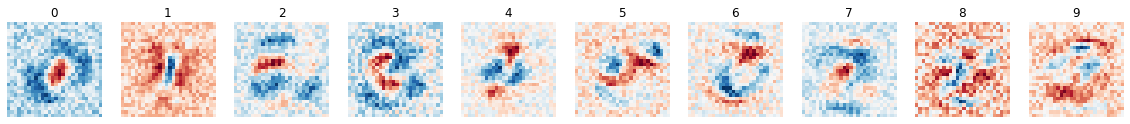

In [14]:
fig, axs = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
  subplot = axs[i]
  subplot.set_title(i)
  subplot.axis('off')
  # TODO: modify this code to complete the plotting function
  i_weights = weights[:,i] # Select the weights for the i'th output
  img = i_weights.reshape(28,28) # Reshape the weights into a 28x28 array
  subplot.imshow(img, plt.get_cmap('RdBu'))
plt.show()

### 2b: Implement a deep neural network

**TODO**

Modify this code to create a deep neural network. Train your model using the code below, and compare the accuracy to the linear model above. 

Note: you do not need to modify any sections other than the model definition and the call method. 

The code below uses compiled versions of the training and evaluation loops (remove the ```@tf.function``` annotations if you need to debug).

In [15]:
class MyDNN(Model):
  def __init__(self):
    super(MyDNN, self).__init__()
    self.flatten = Flatten()
    # Modify me
    self.l1 = Dense(128,activation='relu')
    self.l2 = Dense(64, activation='relu')
    self.d1 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    x = self.l1(x)
    x = self.l2(x)
    return self.d1(x)

model = MyDNN()

In [16]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

These are helper functions we'll use to record loss and accuracy while your model is trained.

In [17]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

This method trains the model on a batch of data.

In [18]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

This method evaluates the model on a batch of data.

In [19]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

Training and evaluation loop.

In [20]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.23510780930519104, Accuracy: 93.12333679199219, Test Loss: 0.12853319942951202, Test Accuracy: 96.10000610351562
Epoch 2, Loss: 0.09916936606168747, Accuracy: 97.01667022705078, Test Loss: 0.13081413507461548, Test Accuracy: 96.17000579833984
Epoch 3, Loss: 0.06810899823904037, Accuracy: 97.86000061035156, Test Loss: 0.09318985790014267, Test Accuracy: 97.3499984741211
Epoch 4, Loss: 0.052373334765434265, Accuracy: 98.29166412353516, Test Loss: 0.08615615218877792, Test Accuracy: 97.48999786376953
Epoch 5, Loss: 0.03985549882054329, Accuracy: 98.70166778564453, Test Loss: 0.08217605203390121, Test Accuracy: 97.68000030517578


Comparing the above model with linear model, we see that the loss reduces to 0.09 from 0.33 meaning above model is much better as compared to the linear model.

### 2c: Provide your own implementation of softmax and use it to train a model

In your linear model above, the starter code looked similar to: 


```
class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)
``` 

Now, create a function:


```
def my_softmax(logits):
  # ...
```

and use it in your model as follows:


```
class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return my_softmax(x)
``` 

Notice, we've removed the built-in activation method on the Dense layer, and added our own to the call method.

Tip: You can implement softmax first using NumPy, if you like, the gradually convert your code to use TensorFlow ops (which begin with tf.\* instead of np.\*).

Notes: 

- Your softmax implementation should be numerically stable. 
- You will need to use tf.* ops in order to use your code to train a model (TF cannot backprop through NumPy operations).

In [21]:
# TODO: your code here
def my_softmax(x):  
  # Write me
  z = x - tf.reduce_max(x)
  numerator = tf.exp(z)
  denominator = tf.reduce_sum(numerator)
  return numerator/denominator

class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return my_softmax(x)
  
model = MyModel()


@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)
# TODO
# Add code to train this model
# When it's trained, the accuracy should be similar to the linear
# model from part one (but not identical, the weights are initialized randomly)
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.3560088574886322, Accuracy: 90.0566635131836, Test Loss: 0.2881966829299927, Test Accuracy: 91.88999938964844
Epoch 2, Loss: 0.2877148389816284, Accuracy: 91.96166229248047, Test Loss: 0.27447181940078735, Test Accuracy: 92.20999908447266
Epoch 3, Loss: 0.27359867095947266, Accuracy: 92.29833221435547, Test Loss: 0.26679807901382446, Test Accuracy: 92.43000030517578
Epoch 4, Loss: 0.2641370892524719, Accuracy: 92.66832733154297, Test Loss: 0.2624841034412384, Test Accuracy: 92.5199966430664
Epoch 5, Loss: 0.2593003213405609, Accuracy: 92.72666931152344, Test Loss: 0.25948184728622437, Test Accuracy: 92.55999755859375


The test loss for linear model ranges between 0.47 to 0.33 and test loss for second model with custom softmax function ranges between 0.35 to 0.25